In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,2]])

mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.3],[0.3,1.6]])

In [3]:
dist_01=np.random.multivariate_normal(mean_01,cov_01,400)
dist_02=np.random.multivariate_normal(mean_02,cov_02,400)


In [4]:
print(dist_01.shape)
print(dist_02.shape)

(400, 2)
(400, 2)


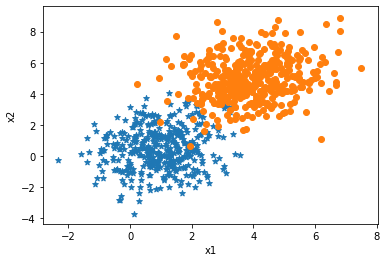

In [5]:
plt.scatter(dist_01[:,0],dist_01[:,1],marker="*")
plt.scatter(dist_02[:,0],dist_02[:,1])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [6]:
total=dist_01.shape[0]+dist_02.shape[0]

In [7]:
data=np.zeros((total,3))

In [8]:
data[:400,:-1]=dist_01
data[400:,:-1]=dist_02
data[400:,-1]=1

In [9]:
print(data)

[[ 0.60577091  1.50103165  0.        ]
 [ 0.90365839 -0.3990169   0.        ]
 [ 0.08570465  0.97386291  0.        ]
 ...
 [ 4.02101202  4.47036297  1.        ]
 [ 4.98480871  6.46756636  1.        ]
 [ 2.52584869  3.85591299  1.        ]]


In [10]:
np.random.shuffle(data)
print(data)

[[0.5948018  0.59891901 0.        ]
 [2.37942571 2.90808683 1.        ]
 [1.56971024 2.21195324 0.        ]
 ...
 [4.42222521 5.23465063 1.        ]
 [4.7866616  8.72825064 1.        ]
 [3.25417675 2.3522281  1.        ]]


In [11]:
print(data)

[[0.5948018  0.59891901 0.        ]
 [2.37942571 2.90808683 1.        ]
 [1.56971024 2.21195324 0.        ]
 ...
 [4.42222521 5.23465063 1.        ]
 [4.7866616  8.72825064 1.        ]
 [3.25417675 2.3522281  1.        ]]


In [12]:
u = np.mean(data[:,:-1],axis=0)
sigma = np.std(data[:,:-1],axis=0)

data[:,:-1] = (data[:,:-1]-u)/sigma
print(data.shape)

one=np.ones((data.shape[0],1))
data=np.hstack((one,data))

(800, 3)


In [13]:
train_data=data[:600,:-1]
y_data=data[:600,-1]

In [14]:
test_data=data[600:,:-1]
test_y=data[600:,-1]

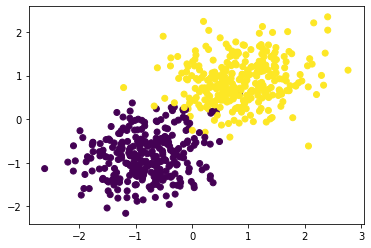

In [15]:
plt.scatter(train_data[:,1],train_data[:,2],c=y_data)
plt.show()

In [16]:
print(y_data)

[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.

In [17]:
np.mean(test_data,axis=0)

array([ 1.        , -0.08243001, -0.08230009])

In [18]:
train_data[0]

array([ 1.        , -1.01114697, -0.81632841])

In [19]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [20]:
def hypo(x,theta):
    return sigmoid(np.dot(x,theta))

In [21]:
# def error_list(x,y,theta):
#     m=x.shape[0]
#     total_error=0.0
    
#     for i in range(m):
#         y_hat=hypo(x[i],theta)
#         total_error+= (y[i]*np.log2(y_hat)+(1-y[i])*np.log2(1-y_hat))
                      
#     return total_error/m

def error(Y,X,theta):
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        y_hat = hypothesis(X[i],theta)
        total_error += (Y[i]*np.log2(y_hat)+(1-Y[i])*np.log2(1-y_hat)) 
        
    return total_error/m #Average Loss

In [61]:
# def grad(x,y,theta):
#     grad=np.zeros(theta.shape)
#     m=x.shape[0]
    
#     for i in range(m):
#         #print(hypo(x[i],theta))
#         y_hat=hypo(x[i],theta)
#         x = x[i].reshape((-1,1))
#         print(x[i].shape)
#         print(y_hat.shape)
#         grad+=(y[i]-y_hat)*x
#     return grad/m
def get_grad(Y,X,theta):
    
    grad = np.zeros(theta.shape)
    m = X.shape[0]
    for i in range(m):
        y_hat = hypo(X[i],theta)
        x = X[i].reshape((-1,1))
        print(X[i])
        grad += (Y[i] - y_hat)*x
        
        
    return grad/m #Average Gradient

In [62]:
def gradientdescent(x,y,learning_rate=0.001,max_steps=500):
    theta=np.zeros((x.shape[1],1))
    error=[]
    
    for i in range(max_steps):
        theta=theta-learning_rate*get_grad(x,y,theta)
        e=error_list(x,y,theta)
        error.append(e)
    return theta,error
    

In [63]:
theta=gradientdescent(train_data,y_data)

0.0


ValueError: non-broadcastable output operand with shape (3,1) doesn't match the broadcast shape (3,3)

In [48]:
print(theta)

NameError: name 'theta' is not defined

In [ ]:
def predict(xtest,theta):
    prob = hypo(xtest,theta)
    if prob<=0.5:
        return 0
    else:
        return 1

In [ ]:
Y_Pred = np.array([predict(test_data[i],theta) for i in range(test_data.shape[0])])

In [ ]:
print("Test Accuracy")
np.sum((Y_Pred==test_y))*100/test_y.shape[0]